First Experiments with Color Swapping
... following along with Aakash Agrawal's Medium blog post: https://medium.com/data-science/color-swapping-techniques-in-image-processing-fe594b3ca31a

Goal:
- swap the green portions in the Penn map with orange

In [2]:
import cv2
import matplotlib.pyplot as plt

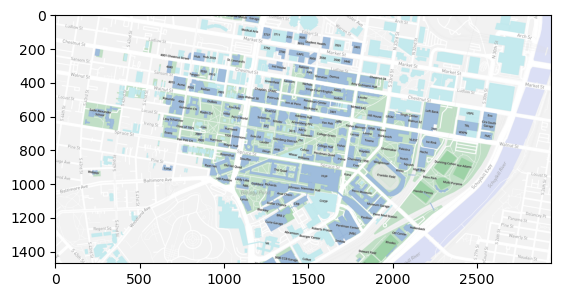

In [6]:
# original image
img = cv2.imread('images/penn_map.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, by default, uses BGR space
plt.imshow(img)

First Attempt: Swapping w/in the RGB space

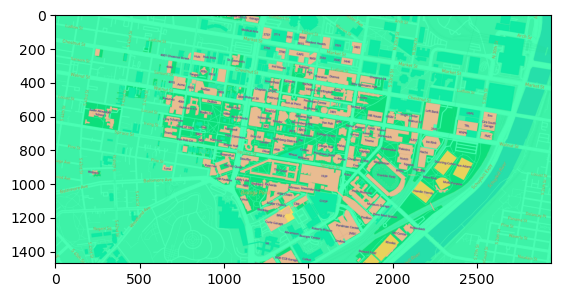

In [20]:
# create a copy of the original image
img_rgb = img.copy()

# extract channels of the rgb image
r = img_rgb[:,:,0]  # first : takes all the rows, second : takes all the columns, 0 takes the first channel (R)
g = img_rgb[:,:,1]
b = img_rgb[:,:,2]

# print(img_rgb)

# to make things more orange (starting from green), increase the red pixel values by 100
b = b - 75
r = r + 75    

# if pixel values become > 255, subtract 255 (clipping, but in a circular fashion; 255 + x goes to x instead of 255)
cond = r[:, :] > 255 # boolean 2D arr
r[cond] = r[cond] - 255 

b_cond = b[:, :] < 0 # boolean 2D arr
b[b_cond] = b[b_cond] + 255 

# assign the modified channel to image
img_rgb[:,:,0] = r
img_rgb[:,:,2] = b

plt.imshow(img_rgb)

Second Attempt: Changing hue in HSV

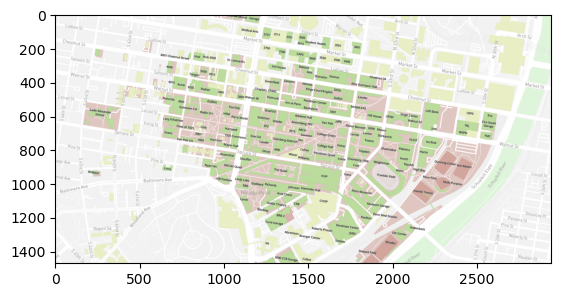

In [26]:
# convert the image from rgb space to hsv space
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# extract the hue channel from the hsv image
hue = img_hsv[:,:,0]

# decrement the hue values by 20
hue = hue - 60

# if pixel values become < 180, add 180 
cond = hue[:, :] < 0
hue[cond] = hue[cond] + 180

# assign the modified hue channel to hsv image
img_hsv[:,:,0] = hue

im = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(im)